<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/DataMining2024_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Assignment 2
by Fayyaz Minhas

Version: Feb 16, 2024

## Image Data Download

You can do it manually as well from the given URL.

In [31]:
!wget https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/patches_256.zip
!unzip /content/patches_256.zip -d /content/

'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
unzip:  cannot find either /content/patches_256.zip or /content/patches_256.zip.zip.


## Download and load expression data into a dataframe

This data can be read using this code (not to be changed). Each row in the resulting data frame contains information about a single spot such as its spatial location coordinates (Location_Center_Y, Location_Center_X) and the expression values of 38 different proteins. The names of the proteins are given in the list “proteins_names”.  The code  also creates two additional columns 'specimen_id' and 'image_id' which will be needed for this assignment. df.specimen_id contains the identifier or name of the specimen (A1, B1, C1 or D1) from which the spot originates.  df.image_id contains the file name of the image file corresponding to each spot (without the png extension).

Note there may be some images for which no expression is available. You can drop those images.

In [32]:
import pandas as pd
df = pd.read_csv('https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/protein_expression_data.csv')


df['specimen_id']=df.VisSpot.apply(lambda x: x.split('-')[2]) #create specimen id field
df['image_id']=df.VisSpot.apply(lambda x: x.split('-')[2])+'_'+df.id #create image id field
df = df.set_index('image_id').sort_index()
protein_names = ['SMAa', 'CD11b',
       'CD44', 'CD31', 'CDK4', 'YKL40', 'CD11c', 'HIF1a', 'CD24', 'TMEM119',
       'OLIG2', 'GFAP', 'VISTA', 'IBA1', 'CD206', 'PTEN', 'NESTIN', 'TCIRG1',
       'CD74', 'MET', 'P2RY12', 'CD163', 'S100B', 'cMYC', 'pERK', 'EGFR',
       'SOX2', 'HLADR', 'PDGFRa', 'MCT4', 'DNA1', 'DNA3', 'MHCI', 'CD68',
       'CD14', 'KI67', 'CD16', 'SOX10']
print(df)

          Unnamed: 0                VisSpot  Location_Center_Y  \
image_id                                                         
A1_0x40          412  AAGTAAGCTTCCAAAC-1-A1         764.003658   
A1_0x42         7325  GTTTGAGCGGTTATGT-1-A1         799.511111   
A1_0x44         8102  TCACTCAGCGCATTAG-1-A1         832.902467   
A1_0x46         7085  GTGCGCTTACAAATGA-1-A1         858.343544   
A1_0x48         3748  CGAAGACTGCCCGGGA-1-A1         892.179831   
...              ...                    ...                ...   
D1_9x63         3609  CCTCCCGACAATCCCT-1-D1         123.760525   
D1_9x65          172  AACACGACTGTACTGA-1-D1          29.281573   
D1_9x67         2686  CACCGCCGACCAGCGA-1-D1         938.403662   
D1_9x69         2813  CAGAGTGATTTAACGT-1-D1         844.093656   
D1_9x71         6877  GTCAGTTGTGCTCGTT-1-D1         740.107483   

          Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
image_id                                                    

# Showing an example image

The code below will load an example image. It also shows how you can get the HED channels.

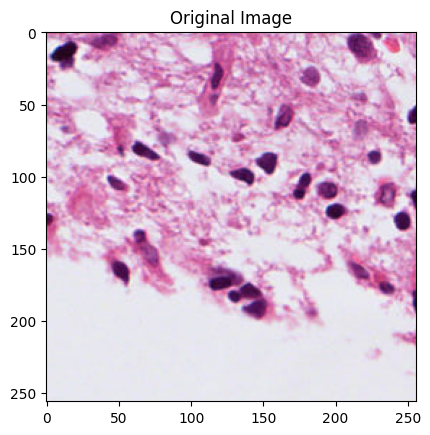

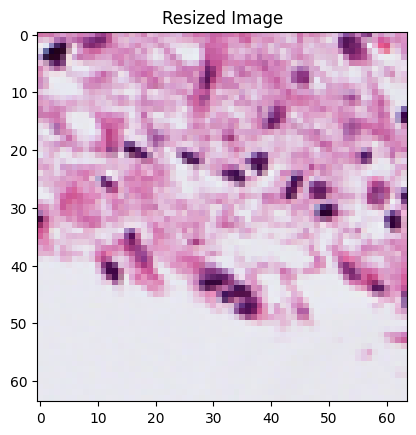

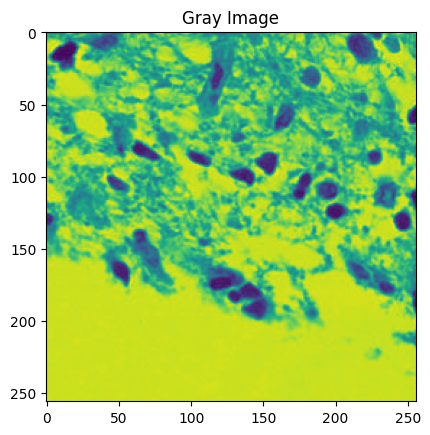

In [1]:
image_folder = 'patches_256/'
gray_folder = 'patches_gray/'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb, rgb2gray
import matplotlib.pyplot as plt
from PIL import Image

# Replace 'path_to_image' with the path to the image you want to display
image_path = image_folder+'A1_0x40.png'
gray_path = gray_folder+'A1_0x40.png'
import matplotlib.pyplot as plt
I = imread(image_path)[:, :, :3] #read sample RGB image
I_resize = Image.open(image_path).resize((64,64))
I_gray = imread(gray_path)
#I_hed =  rgb2hed(I) #convert to HED
plt.imshow(I);plt.title('Original Image');plt.show()
plt.imshow(I_resize);plt.title('Resized Image');plt.show()
plt.imshow(I_gray);plt.title('Gray Image');plt.show()
#I_h = I_hed[:,:,0];plt.figure();plt.imshow(I_h,cmap='gray');plt.colorbar();plt.title('H Channel');plt.show()
#I_e = I_hed[:,:,1];plt.figure();plt.imshow(I_e,cmap='gray');plt.colorbar();plt.title('E Channel');plt.show()
#I_d = I_hed[:,:,2];plt.figure();plt.imshow(I_d,cmap='gray');plt.colorbar();plt.title('D Channel');plt.show()

## Useful hints:
* Feel free to resize the images to reduce the amount of required compute. However, if you do this, please ensure that the code for doing this is included in your submission notebook.

* Look at glob (https://docs.python.org/3/library/glob.html) to get list of all file names in a given folder.

* For calculating various regression metrics, please see: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics


<style>
table th:first-of-type {
    width: 120pt;
}
table th {
    width: 100pt;
}
</style>

| Model | RMSE | Pearson | Spearman | R2 Score |
| :---- | :--: | :-----: | :------: | :------: |
| OLS + PCA | 0.5700 | 0.6464 | 0.7399 | 0.2584 |
| OLS + TL | 0.5943 | 0.4715 | 0.5657 | 0.1937 |
| MLP + HRGB | 0.5906 | 0.6617 | 0.7336 | 0.2036 |
| MLP + PCA | 0.5839 | 0.6466 | 0.7392 | 0.2217 |
| MLP + TL | 0.5865 | 0.4708 | 0.5601 | 0.2147 |
| SVR + HRGB | 0.5449 | 0.6635 | 0.7415 | 0.3222 |
| SVR + PCA | 0.5785 | 0.6344 | 0.7199 | 0.2359 |
| SVR + TL | 0.6080 | 0.4080 | 0.5654 | 0.1561 |
| CNN | 0.5942 | 0.5327 | 0.5783 | 0.1940 |
| ResNet TL | 0.5977 | 0.5529 | 0.6112 | 0.1844 |
| **SVR + combined** | **0.5414** | **0.6661** | **0.7435** | **0.3309** |

Predicting Protein ***EGFR***

<style>
table th:first-of-type {
    width: 120pt;
}
table th {
    width: 100pt;
}
</style>

| Val Specimen | RMSE | Pearson | Spearman | R2 Score |
| :----------- | :--: | :-----: | :------: | :------: |
| *A1* | 0.6461 | 0.6194 | 0.7251 | 0.3622 |
| *B1* | 0.4490 | 0.5778 | 0.3207 | 0.3187 |
| *C1* | 0.5768 | 0.6242 | 0.6888 | 0.2405 |
| *D1* | 0.4339 | 0.1454 | 0.1424 | -0.2098 |
| ***Average*** | ***0.5265*** | ***0.4917*** | ***0.4693*** | ***0.1779*** |
| ***Standard Deviation*** | ***0.1023*** | ***0.2318*** | ***0.2843*** | ***0.2633*** |

Predicting Protein ***PTEN***

<style>
table th:first-of-type {
    width: 120pt;
}
table th {
    width: 100pt;
}
</style>

| Val Specimen | RMSE | Pearson | Spearman | R2 Score |
| :----------- | :--: | :-----: | :------: | :------: |
| *A1* | 0.6435 | 0.6167 | 0.7435 | 0.3673 |
| *B1* | 0.4765 | 0.5112 | 0.3634 | 0.2329 |
| *C1* | 0.5418 | 0.5841 | 0.6455 | 0.3298 |
| *D1* | 0.4016 | 0.1443 | 0.1440 | -0.0363 |
| ***Average*** | ***0.5159*** | ***0.4641*** | ***0.4741*** | ***0.2234*** |
| ***Standard Deviation*** | ***0.1026*** | ***0.2177*** | ***0.2727*** | ***0.1822*** |

Predicting Protein ***NESTIN***

<style>
table th:first-of-type {
    width: 120pt;
}
table th {
    width: 100pt;
}
</style>

| Val Specimen | RMSE | Pearson | Spearman | R2 Score |
| :----------- | :--: | :-----: | :------: | :------: |
| *A1* | 0.6500 | 0.6071 | 0.7350 | 0.3543 |
| *B1* | 0.4814 | 0.5094 | 0.3713 | 0.2170 |
| *C1* | 0.5348 | 0.6076 | 0.6740 | 0.3471 |
| *D1* | 0.3941 | 0.1201 | 0.1197 | 0.0023 |
| ***Average*** | ***0.5151*** | ***0.4611*** | ***0.4750*** | ***0.2302*** |
| ***Standard Deviation*** | ***0.1070*** | ***0.2319*** | ***0.2853*** | ***0.1645*** |

Predicting Protein ***SOX2***

<style>
table th:first-of-type {
    width: 120pt;
}
table th {
    width: 100pt;
}
</style>

| Val Specimen | RMSE | Pearson | Spearman | R2 Score |
| :----------- | :--: | :-----: | :------: | :------: |
| *A1* | 0.6560 | 0.6011 | 0.7223 | 0.3424 |
| *B1* | 0.4639 | 0.5880 | 0.3033 | 0.2729 |
| *C1* | 0.5387 | 0.5927 | 0.6411 | 0.3374 |
| *D1* | 0.4011 | -0.0414 | -0.0177 | -0.0338 |
| ***Average*** | ***0.5149*** | ***0.4351*** | ***0.4123*** | ***0.2297*** |
| ***Standard Deviation*** | ***0.1096*** | ***0.3177*** | ***0.3392*** | ***0.1785*** |

Predicting Protein ***MET***

<style>
table th:first-of-type {
    width: 120pt;
}
table th {
    width: 100pt;
}
</style>

| Val Specimen | RMSE | Pearson | Spearman | R2 Score |
| :----------- | :--: | :-----: | :------: | :------: |
| *A1* | 0.6394 | 0.6325 | 0.7550 | 0.3753 |
| *B1* | 0.4667 | 0.5874 | 0.3746 | 0.2640 |
| *C1* | 0.5748 | 0.5973 | 0.6714 | 0.2457 |
| *D1* | 0.3495 | 0.5217 | 0.4924 | 0.2150 |
| ***Average*** | ***0.5076*** | ***0.5847*** | ***0.5734*** | ***0.2750*** |
| ***Standard Deviation*** | ***0.1272*** | ***0.0463*** | ***0.1719*** | ***0.0699*** |